# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Info

In [3]:
data = pd.read_csv('naukri.csv')
data.sample(5)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
5579,Myfriday,UG: Any Graduate PG:MBA/PGDM Doctorate:Any Doc...,3 - 5 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Skill...,240815500828,"Bengaluru/Bangalore , Bengaluru / Bangalore",SOCIAL MEDIA MANAGER,NaN,Not Disclosed by Recruiter,2016-01-29 14:07:09 +0000,NaN,Marketing,e75afd61d7cc4575a667c47cd3442316
17197,VAS Softwares Pvt. Ltd,UG: Any Graduate PG:Any Postgraduate Doctorate...,1 - 6 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Job D...,111215501097,Mumbai,Business Development Executive,NaN,Not Disclosed by Recruiter,2015-12-29 02:24:01 +0000,NaN,Sales,b0ade062c569c36d24fcfbb5333d0921
11836,Intuit Technology Services Pvt Ltd,UG: B.Tech/B.E. PG:M.Tech Doctorate:Any Doctor...,5 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Come ...,10416500684,"Bengaluru/Bangalore , karnataka",Senior Software Engineer in Quality,NaN,Not Disclosed by Recruiter,2016-04-01 07:24:20 +0000,NaN,IT Software - QA & Testing,3da1ac05ec32df8b3a17d9449123c827
6262,Spinco Biotech Pvt Ltd,UG: B.Tech/B.E. PG:M.Tech Doctorate:Any Doctor...,2 - 5 yrs,Pharma / Biotech / Clinical Research,Job Description Send me Jobs like this Spinc...,260515502427,"Bengaluru/Bangalore , Delhi/NCR , Hyderabad / ...",Chemical Engineers,NaN,Not Disclosed by Recruiter,2016-01-29 14:07:33 +0000,NaN,Medical,198681239df054893a5d379638240416
8686,Vinitec HR Consultants,UG: Any Graduate - Any Specialization PG:MBA/P...,2 - 4 yrs,Recruitment / Staffing,Job Description Send me Jobs like this Male ...,40516901132,Gurgaon,Retail Merchandiser,NaN,Not Disclosed by Recruiter,2016-05-04 11:35:50 +0000,NaN,Fashion Designing,a20a557cf583098edf6e9e54df7db227


Job Data available on Naukri.com

In [4]:
data.shape

(22000, 14)

In [5]:
# check null value
data.isnull().sum()

company                    4
education               1996
experience                 4
industry                   5
jobdescription             4
jobid                      0
joblocation_address      501
jobtitle                   0
numberofpositions      17536
payrate                   97
postdate                  23
site_name              18013
skills                   528
uniq_id                    0
dtype: int64

In [6]:
# check duplicate
data.duplicated().sum()

0

In [7]:
data.nunique()

company                 8469
education               2355
experience               147
industry                  63
jobdescription         21063
jobid                  21910
joblocation_address     2329
jobtitle               17564
numberofpositions         84
payrate                 1848
postdate                4203
site_name                  1
skills                    45
uniq_id                22000
dtype: int64

In [8]:
data.dtypes

company                 object
education               object
experience              object
industry                object
jobdescription          object
jobid                    int64
joblocation_address     object
jobtitle                object
numberofpositions      float64
payrate                 object
postdate                object
site_name               object
skills                  object
uniq_id                 object
dtype: object

# Feature Engineering

In [9]:
# copy data

df = data.copy()

In [10]:
# fill na value with 'unknown' value
df['company'] = df['company'].fillna('unknown')
df['education'] = df['education'].fillna('unknown')
df['experience'] = df['experience'].fillna('unknown')
df['industry'] = df['industry'].fillna('industry')
df['jobdescription'] = df['jobdescription'].fillna('unknown')
df['joblocation_address'] = data['joblocation_address'].fillna('unknown')
df['skills'] = df['skills'].fillna('unknown')
df['payrate'] = df['payrate'].fillna('unknown')

# fill na in numberofpositions column with 1
df['numberofpositions'] = df['numberofpositions'].fillna(1).astype(int)

# fill na in site_name with 'www.naukri.com'
df['site_name'] = df['site_name'].fillna('www.naukri.com')

In [11]:
# drop na in postdate column
df = df.dropna()

In [12]:
# check null value
df.isnull().sum()

company                0
education              0
experience             0
industry               0
jobdescription         0
jobid                  0
joblocation_address    0
jobtitle               0
numberofpositions      0
payrate                0
postdate               0
site_name              0
skills                 0
uniq_id                0
dtype: int64

## Feature Engineering Education Column

In [13]:
df['education'] = df['education'].str.split(' ')
df['education'] = df['education'].apply(lambda x: x[1] if len(x) > 1 else x[0])

df['education'].value_counts(dropna = False)

Any                    11822
B.Tech/B.E.             6025
unknown                 1991
B.Com                    454
B.Sc                     286
Diploma                  256
B.B.A                    197
Graduation               135
B.A                      133
BCA                       95
MBBS                      88
B.Ed                      63
B.Pharma                  61
Other                     55
Doctorate                 49
LLB                       47
-                         38
BHM                       30
BDS                       27
B.Arch                    25
Not                       21
B.Sc,                     16
B.Tech/B.E.,              16
Postgraduate              10
PG:CA                      7
Diploma,                   4
B.Pharma,                  4
B.Com,                     4
BCA,                       3
B.A,                       3
B.B.A,                     2
MBA/PGDM                   2
BVSC                       2
Doctorate:Doctorate        1
PG:Other      

In [14]:
# cleaning

df['education'] = df['education'].replace(('B.Tech/B.E.','Graduation','Other','-','Not','B.Tech/B.E.,','Postgraduate',
                                               'PG:CA','Diploma,','B.Com,','B.Pharma,','B.A,','BCA,','B.Sc,','MBA/PGDM','B.B.A,',
                                              'PG:Other','Doctorate:Doctorate','Post'),
                                              ('B.Tech','B.Tech','B.Tech','B.Tech','B.Tech','B.Tech','B.Tech',
                                              'CA','Diploma','B.Com','B.Pharma','B.A','BCA','B.Sc','MBA','BBA',
                                              'B.Tech','Doctorate','B.Tech'))

df['education'].value_counts()

Any          11822
B.Tech        6302
unknown       1991
B.Com          458
B.Sc           302
Diploma        260
B.B.A          197
B.A            136
BCA             98
MBBS            88
B.Pharma        65
B.Ed            63
Doctorate       50
LLB             47
BHM             30
BDS             27
B.Arch          25
CA               7
MBA              2
BVSC             2
BBA              2
B.Des.           1
BAMS             1
BFA              1
Name: education, dtype: int64

## Feature Engineering Experience Column

In [15]:
df['experience'].sample(5)

4428     0 - 5 yrs
981      3 - 6 yrs
3235     1 - 5 yrs
20164    2 - 3 yrs
19321    2 - 3 yrs
Name: experience, dtype: object

In [16]:
df['experience'] = df['experience'].str.split(' ')

In [17]:
df['experience'].head()

0      [0, -, 1, yrs]
1      [0, -, 0, yrs]
2      [4, -, 8, yrs]
3    [11, -, 15, yrs]
4      [6, -, 8, yrs]
Name: experience, dtype: object

In [18]:
df['experience_min'] = df['experience'].apply(lambda x: x[0])

In [19]:
df['experience_min'].head()

0     0
1     0
2     4
3    11
4     6
Name: experience_min, dtype: object

In [20]:
df['experience_max'] = df['experience'].apply(lambda x: x[2] if len(x) > 2 else x[0])

In [21]:
df['experience_max'].head()

0     1
1     0
2     8
3    15
4     8
Name: experience_max, dtype: object

In [22]:
df['experience_min'] = df['experience_min'].replace('Not',0)

In [23]:
df['experience_max'] = df['experience_max'].replace('Not',0)
df['experience_max'] = df['experience_max'].replace(-1,5)

In [24]:
df['experience_min'] = df['experience_min'].astype(int)
df['experience_max'] = df['experience_max'].astype(int)

In [25]:
df['experience_min'].dtypes

dtype('int64')

In [26]:
df['experience_max'].dtypes 

dtype('int64')

## Feature Engineering Industry Column

In [27]:
df['industry'].sample(6)

16995                     Media / Entertainment / Internet
19705    NGO / Social Services / Regulators / Industry ...
7016                                Recruitment / Staffing
6098                  Pharma / Biotech / Clinical Research
400                        IT-Software / Software Services
21185        Oil and Gas / Energy / Power / Infrastructure
Name: industry, dtype: object

In [28]:
df['industry'] = df['industry'].str.split(' / ')
df['industry'] = df['industry'].apply(lambda x: x[0])
df['industry'].sample(5)

27          Internet
7246     IT-Software
14727    IT-Software
11903        Banking
173      IT-Software
Name: industry, dtype: object

## Feature Engineering Job Location Address Column

In [29]:
df['joblocation_address'].sample(10)

3606      Hyderabad / Secunderabad
21274                    Hyderabad
15302          Bengaluru/Bangalore
10751          Bengaluru/Bangalore
5421           Bengaluru/Bangalore
15922                       Mumbai
13745                       Mumbai
21478    Hyderabad, Mumbai, Jhansi
6252           Bengaluru/Bangalore
17296                       Mumbai
Name: joblocation_address, dtype: object

In [30]:
df['joblocation_address'] = df['joblocation_address'].str.split(',')
pd.set_option('max_rows', 30000)
df['joblocation_address'].sample(10)

2118         [Hyderabad / Secunderabad]
19474    [Noida ,  Noida/Greater Noida]
1440                        [Bengaluru]
311                         [Bengaluru]
1748                        [Bengaluru]
1412                        [Bengaluru]
11618             [Bengaluru/Bangalore]
14028        [Hyderabad / Secunderabad]
3051         [Hyderabad / Secunderabad]
122                  [Bengaluru,  Pune]
Name: joblocation_address, dtype: object

In [31]:
df = df.explode('joblocation_address')
pd.set_option('max_rows', 30000)
df['joblocation_address'].value_counts()

Bengaluru/Bangalore                               3774
Mumbai                                            2593
Bengaluru/Bangalore                               2133
Bengaluru                                         2025
 Mumbai                                           1378
Chennai                                           1283
Hyderabad / Secunderabad                          1246
Hyderabad                                         1154
Mumbai                                            1067
 Mumbai                                            923
 Chennai                                           904
Delhi                                              790
Noida                                              776
Gurgaon                                            762
 Chennai                                           737
 Hyderabad / Secunderabad                          700
Delhi                                              680
 Pune                                              645
 Delhi    

In [32]:
df['joblocation_address'] = df['joblocation_address'].replace(('(Bengaluru/Bangalore)',' Bangalore',
                                                                ' Bangalore ','Bangalore ','Bengaluru/Bangalore ',
                                                                 ' Bengaluru/Bangalore ',' Bengaluru/Bangalore',
                                                                'Bengaluru/Bangalore','Bengaluru','NCR Bangalore',
                                                                'NCR Bangalore ','Near Bangalore', ' Bengaluru/Bangalore',
                                                                 ' Bengaluru/Bangalore ', ' Bengaluru',
                                                                 'Bangalore , Bangalore / Bangalore',
                                                                 'Bangalore , karnataka',' Bengaluru / Bangalore', 
                                                                 ' Bengaluru / Bangalore ', 'Bengaluru Bangalore',
                                                                 'India-Karnataka-Bangalore',' bangalore',' karnataka',
                                                                ' Bengaluru Bangalore'),
                                                                ('Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                 'Bangalore','Bangalore', 'Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore',))
                                                                
df['joblocation_address'] = df['joblocation_address'].replace(('Hyderabad / Secunderabad',' Hyderabad / Secunderabad',
                                                                 ' Hyderabad / Secunderabad ','Hyderabad / Secunderabad ',
                                                                ' Hyderabad','Hyderabad ',' Hyderabad ',
                                                                 'Hyderabad/Secunderabad','Hyderabad/Secunderabad ',
                                                                ' Hyderabad/Secunderabad ',' Hyderabad/Secunderabad',),
                                                                ('Hyderabad', 'Hyderabad','Hyderabad','Hyderabad',
                                                                 'Hyderabad', 'Hyderabad','Hyderabad','Hyderabad',
                                                                'Hyderabad','Hyderabad','Hyderabad'))


  
df['joblocation_address'] = df['joblocation_address'].replace(('NAVI MUMBAI',' NAVI MUMBAI','NAVI MUMBAI ',
                                                                 ' NAVI MUMBAI',' NAVI MUMBAI ','Mumbai , Mumbai',
                                                                 ' Mumbai',' Mumbai ','Mumbai ','mumbai','Navi Mumbai',
                                                                ' Navi Mumbai',' Navi Mumbai ','Navi Mumbai ', 
                                                                 ' Mumbai Suburbs','Mumbai Suburbs ','Mumbai Suburbs',
                                                                ' Mumbai Suburbs ','mumbai',' mumbai','mumbai ',
                                                                 ' maharashtra'),
                                                                ('Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai',
                                                                 'Mumbai','Mumbai','Mumbai', 'Mumbai','Mumbai','Mumbai',
                                                                'Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai',
                                                                'Mumbai','Mumbai', 'Mumbai'))

df['joblocation_address'] = df['joblocation_address'].replace(('Noida','Noida ',' Noida',' Delhi','Delhi','Delhi ',' Delhi ',
                                                                 'Gurgaon',' Gurgaon',' Gurgaon ','Gurgaon ', ' noida',
                                                                 ' Noida/Greater Noida',' Noida ', ' Delhi NCR',
                                                                 'Delhi/NCR(National Capital Region)',' Delhi/NCR ',
                                                                 ' Delhi/NCR(National Capital Region)',
                                                                 ' Delhi/NCR(National Capital Region) ',
                                                                 'Delhi/NCR(National Capital Region) ','Delhi , Delhi',
                                                                 'Noida , Noida/Greater Noida','Ghaziabad',
                                                                 'Delhi/NCR(National Capital Region) , Gurgaon',
                                                                 'NCR , NCR','NCR/NCR(National Capital Region)',
                                                                'NCR , NCR/Greater NCR','NCR/NCR(National Capital Region), NCR',
                                                                 'NCR , NCR/NCR(National Capital Region)',
                                                                 'NCR/NCR(National Capital Region)','NCR/Greater NCR',
                                                                 'NCR/NCR(National Capital Region) , NCR','Delhi/NCR ',
                                                                ' Noida/Greater Noida','Greater Noida',' Greater Noida',
                                                                 ' Greater Noida ','Greater Noida ','Ghaziabad',' Ghaziabad',
                                                                 'Ghaziabad ',' Ghaziabad ','Faridabad','Faridabad ',
                                                                 ' Faridabad',' Faridabad ',' Noida/Greater Noida',
                                                                 ' Noida/Greater Noida ',' delhi',' Delhi/NCR','Delhi NCR'
                                                                ),
                                                                ('NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR','NCR','NCR','NCR','NCR','NCR', 'NCR','NCR','NCR','NCR',
                                                                 'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                 'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR'))


df['joblocation_address'] = df['joblocation_address'].replace(('Chennai ',' Chennai',' Chennai ',' Chennai',
                                                                 'chennai ',' chennai',' chennai ',' chennai',),
                                                                ('Chennai', 'Chennai','Chennai','Chennai','Chennai',
                                                                'Chennai','Chennai','Chennai',))

df['joblocation_address'] = df['joblocation_address'].replace(('Pune ',' Pune',' Pune '),('Pune','Pune','Pune'))
df['joblocation_address'] = df['joblocation_address'].replace(('Kolkata ',' Kolkata',' Kolkata ',
                                                                ' kolkata','kolkata ',' kolkata'),
                                                                ('Kolkata','Kolkata','Kolkata',
                                                                  'Kolkata','Kolkata','Kolkata'))
df['joblocation_address'] = df['joblocation_address'].replace((' Ahmedabad','Ahmedabad ',' Ahmedabad '),('Ahmedabad',
                                                                                         'Ahmedabad','Ahmedabad'))
df['joblocation_address'] = df['joblocation_address'].replace(('Chandigarh ',' Chandigarh',' Chandigarh '),
                                                                ('Chandigarh','Chandigarh','Chandigarh'))
df['joblocation_address'] = df['joblocation_address'].replace(('Surat ',' Surat',' Surat '),
                                                                ('Surat','Surat','Surat'))
df['joblocation_address'] = df['joblocation_address'].replace(('Ernakulam / Kochi/ Cochin ', ' Kochi', 'Kochi ',' Kochi ',
                                                                 ' Cochin/ Kochi/ Ernakulam', ' Cochin/ Kochi/ Ernakulam ', 
                                                                 ' Ernakulam / Kochi/ Cochin',' Ernakulam / Kochi/ Cochin '),
                                                                ('Kochi','Kochi','Kochi','Kochi','Kochi','Kochi','Kochi',
                                                                 'Kochi',))
df['joblocation_address'] = df['joblocation_address'].replace(('Coimbatore ',' Coimbatore',' Coimbatore '),
                                                                ('Coimbatore','Coimbatore','Coimbatore'))
df['joblocation_address'] = df['joblocation_address'].replace(('Coimbatore ',' Coimbatore',' Coimbatore '),
                                                                ('Coimbatore','Coimbatore','Coimbatore'))
df['joblocation_address'] = df['joblocation_address'].replace(('Lucknow ',' Lucknow',' Lucknow '),
                                                                ('Lucknow','Lucknow','Lucknow'))
df['joblocation_address'] = df['joblocation_address'].replace(('Jaipur ',' Jaipur',' Jaipur ','jaipur ',' jaipur',
                                                                 ' jaipur '),
                                                                ('Jaipur','Jaipur','Jaipur','Jaipur','Jaipur','Jaipur'))
df['joblocation_address'] = df['joblocation_address'].replace(('Vijayawada ',' Vijayawada',' Vijayawada '),
                                                                ('Vijayawada','Vijayawada','Vijayawada'))
df['joblocation_address'] = df['joblocation_address'].replace(('Visakhapatnam ',' Visakhapatnam',' Visakhapatnam ',
                                                                'Visakhapatnam/Vizag ',' Visakhapatnam/Vizag',
                                                                 ' Visakhapatnam/Vizag '),
                                                                ('Visakhapatnam','Visakhapatnam','Visakhapatnam',
                                                                 'Visakhapatnam','Visakhapatnam','Visakhapatnam',
                                                                ))

df['joblocation_address'] = df['joblocation_address'].replace((' Bhubaneshwar',' Bhubaneshwar',' Bhubaneshwar '),
                                                                ('Bhubaneshwar','Bhubaneshwar','Bhubaneshwar'))
df['joblocation_address'] = df['joblocation_address'].replace((' Patna',' Patna',' Patna '),
                                                                ('Patna','Patna','Patna'))

df['joblocation_address'] = df['joblocation_address'].replace((' Trivandrum',' Trivandrum',' Trivandrum '),
                                                                ('Trivandrum','Trivandrum','Trivandrum'))

df['joblocation_address'] = df['joblocation_address'].replace((' Mangalore',' Mangalore',' Mangalore '),
                                                                ('Mangalore','Mangalore','Mangalore'))
df['joblocation_address'] = df['joblocation_address'].replace((' Indore',' Indore',' Indore '),
                                                                ('Indore','Indore','Indore'))
df['joblocation_address'] = df['joblocation_address'].replace((' Guwahati',' Guwahati',' Guwahati '),
                                                                ('Guwahati','Guwahati','Guwahati'))
df['joblocation_address'] = df['joblocation_address'].replace((' Nagpur',' Nagpur',' Nagpur '),
                                                                ('Nagpur','Nagpur','Nagpur'))
df['joblocation_address'] = df['joblocation_address'].replace((' Raipur',' Raipur',' Raipur '),
                                                                ('Raipur','Raipur','Raipur'))
df['joblocation_address'] = df['joblocation_address'].replace((' Thane',' Thane',' Thane '),
                                                                ('Thane','Thane','Thane'))
df['joblocation_address'] = df['joblocation_address'].replace((' Bhopal',' Bhopal',' Bhopal '),
                                                                ('Bhopal','Bhopal','Bhopal'))
df['joblocation_address'] = df['joblocation_address'].replace((' Vadodara/Baroda',' Vadodara/Baroda',' Vadodara/Baroda ',
                                                                ' Vadodara','Vadodara ',' Vadodara '),
                                                                ('Vadodara','Vadodara','Vadodara','Vadodara',
                                                                 'Vadodara','Vadodara',))
                                                                                                                                  
pd.set_option('max_rows', 2400)
df['joblocation_address'].value_counts()

Bangalore                                         9957
NCR                                               8660
Mumbai                                            6403
Hyderabad                                         4566
Chennai                                           3363
Pune                                              1227
Kolkata                                            543
unknown                                            497
Ahmedabad                                          404
Chandigarh                                         189
Kochi                                              140
Coimbatore                                         136
Jaipur                                             131
Visakhapatnam                                      124
Surat                                              106
Lucknow                                            101
Vijayawada                                          84
Bhubaneshwar                                        74
Trivandrum

## Feature Engineering Postdate Column

In [33]:
df['postdate'].sample(5)

20226    2016-12-26 18:18:27 +0000
11247    2016-02-18 07:23:37 +0000
13728    2016-10-21 19:49:18 +0000
13097    2016-11-03 19:48:56 +0000
20112    2015-11-22 22:18:42 +0000
Name: postdate, dtype: object

In [34]:
df['postdate'] = df['postdate'].str.split(' ')
df['postdate'] = df['postdate'].apply(lambda x: x[0])
df['postdate'] = pd.to_datetime(df['postdate'], errors='coerce')
df['postdate'].sample(5)

21002   2016-12-23
8359    2016-05-05
6933    2016-01-29
8465    2016-05-04
19609   2015-11-22
Name: postdate, dtype: datetime64[ns]

In [35]:
df['post_year'] = df['postdate'].dt.year
df['post_month'] = df['postdate'].dt.month
df['post_day_name'] = df['postdate'].dt.day_name()
df['post_day_date'] = df['postdate'].dt.day

## Feature Engineering Skills Column

In [36]:
df['skills'].sample(7)

15203                       Engineering Design
4516     IT Software - Application Programming
17109                              IT Hardware
7412                                        HR
19065                               Journalism
10286                                  Medical
16129    IT Software - Application Programming
Name: skills, dtype: object

In [37]:
df['skills'] = df['skills'].str.split(' - ')

In [38]:
df['skills'] = df['skills'].apply(lambda x: x[1] if len(x) > 1 else x[0])
df['skills'].sample(5)

19877    Journalism
18176         Sales
690            ITES
2400     Production
3185            ERP
Name: skills, dtype: object

# EDA

In [39]:
eda = df.copy()

In [40]:
eda.sample(3)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,experience_min,experience_max,post_year,post_month,post_day_name,post_day_date
3405,Unitforce technologies Pvt. Ltd.,Any,"[3, -, 6, yrs]",IT-Software,Job Description Send me Jobs like this Infor...,10316600137,Mumbai,Informatica Developer Walkin,1,Not Disclosed by Recruiter,2016-02-29,www.naukri.com,Application Programming,2f171c37f011b7f7efee12cbb8a1ea8c,3,6,2016,2,Monday,29
2475,Axis Jobs,Any,"[0, -, 3, yrs]",IT-Software,Job Description Send me Jobs like this Desig...,310316600280,Ahmedabad,HR Executive / Recruitment Executive,6,"2,75,000 - 4,75,000 P.A. Best In The Industry",2016-03-30,www.naukri.com,HR,204de2eb39d37e78bdc2dedd2433acf0,0,3,2016,3,Wednesday,30
8038,Greenspace Constructions,Any,"[1, -, 6, yrs]",Construction,Job Description Send me Jobs like this Manag...,40516004912,NCR,Supply Chain Manager,3,Not Disclosed by Recruiter,2016-05-04,www.naukri.com,Supply Chain,a73ecd1ea277041567475cd1d06c75ba,1,6,2016,5,Wednesday,4


## Company

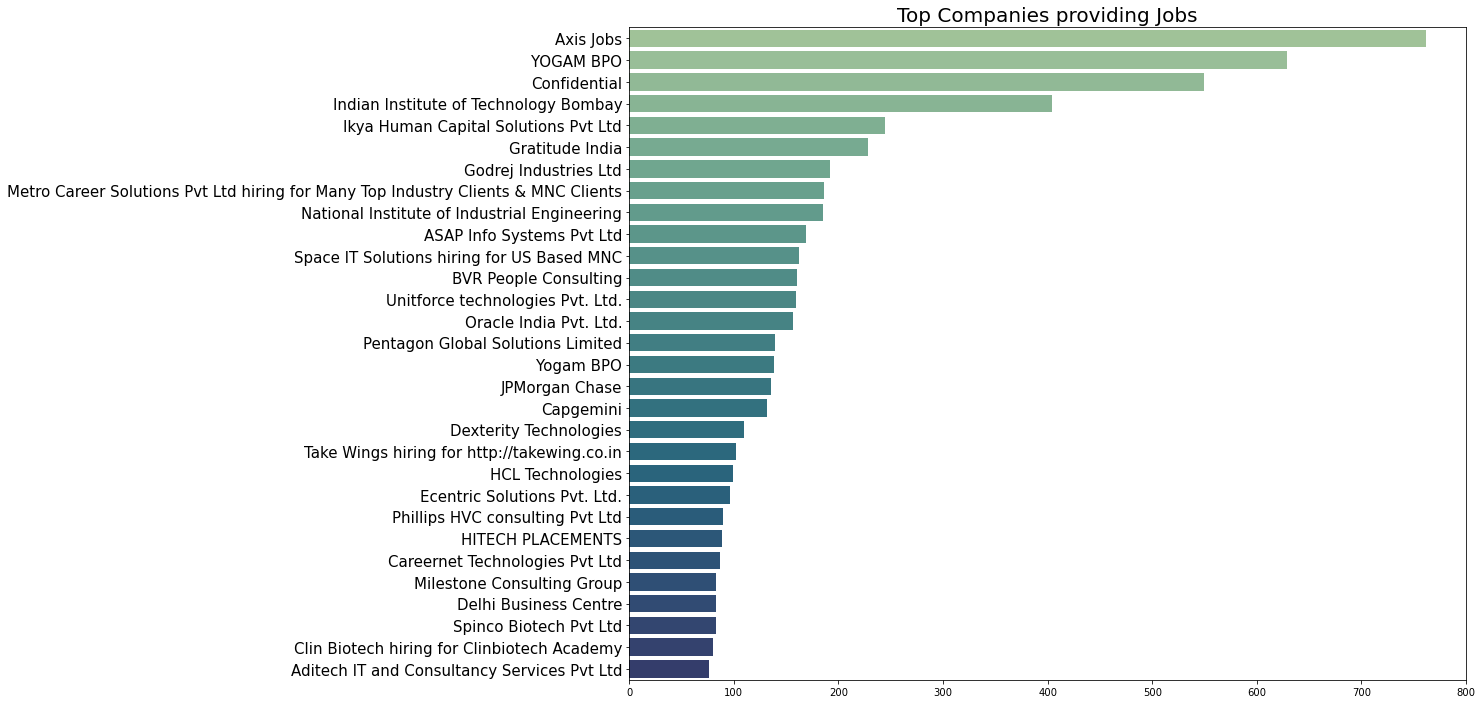

In [41]:
# lets check the top 20 companies providing jobs

plt.rcParams['figure.figsize'] = (15, 12)
sns.barplot(y = eda['company'].value_counts().head(30).index,
            x = eda['company'].value_counts().head(30).values,
            palette = 'crest')
plt.title('Top Companies providing Jobs', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

## Education

In [42]:
# eda['education'] = df['education']

In [43]:
edu = eda.groupby('education').agg(count=('education','count')).sort_values(
    by='count',ascending=False).reset_index().head(12)
edu

,education,count
0,Any,22315
1,B.Tech,10014
2,unknown,3257
3,B.Com,705
4,B.Sc,633
5,Diploma,487
6,B.B.A,284
7,B.A,258
8,BCA,182
9,MBBS,165


Text(0.5, 1.0, 'Education Distribution')

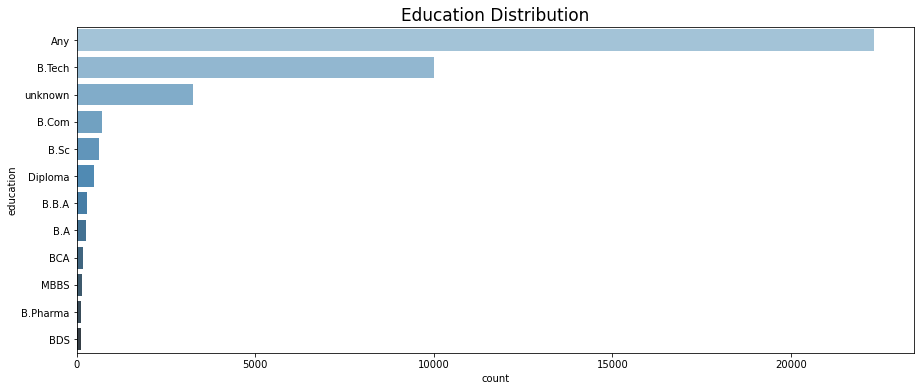

In [44]:
plt.figure(figsize=(15,6))
sns.barplot(x='count', y='education',data=edu, palette='Blues_d')
plt.title('Education Distribution', fontsize=17)

## Experience

In [45]:
eda.groupby('experience_min').agg(count=('experience_min','count')).sort_values(
    by='experience_min',ascending=True).reset_index()

,experience_min,count
0,0,7114
1,1,4777
2,2,7680
3,3,5632
4,4,3277
5,5,3502
6,6,1562
7,7,1110
8,8,1338
9,9,497


In [46]:
eda.groupby('experience_max').agg(count=('experience_max','count')).sort_values(
    by='experience_max',ascending=True).reset_index()

,experience_max,count
0,-1,1
1,0,557
2,1,1306
3,2,1709
4,3,3396
5,4,2777
6,5,6888
7,6,3540
8,7,4706
9,8,3907


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


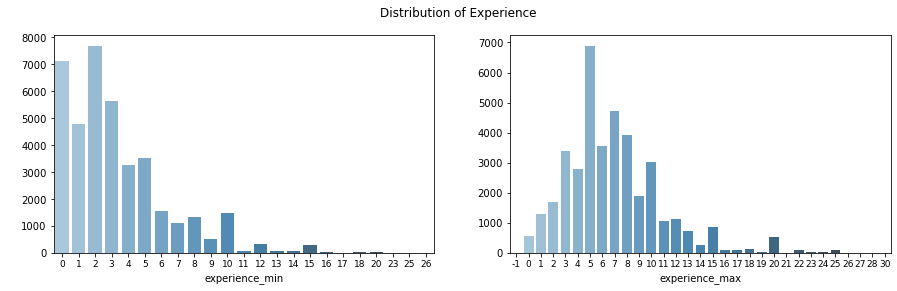

In [47]:
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.countplot(df['experience_min'], palette = 'Blues_d')
plt.xticks(fontsize = 9)
plt.ylabel(' ')

plt.subplot(1, 2, 2)
sns.countplot(df['experience_max'], palette = 'Blues_d')
plt.xticks(fontsize = 9)
plt.ylabel(' ')

plt.suptitle('Distribution of Experience')
plt.show()

## Industry

In [48]:
industry = eda.groupby('industry').agg(count=('industry','count')).sort_values(
    by='count',ascending=False).reset_index()
industry

,industry,count
0,IT-Software,15157
1,BPO,2549
2,Banking,2286
3,Education,1862
4,Recruitment,1613
5,Automobile,1238
6,Pharma,1115
7,Medical,1055
8,Internet,1050
9,Construction,1034


<AxesSubplot:title={'center':'Num of Job Listing by Industry'}, xlabel='count', ylabel='industry'>

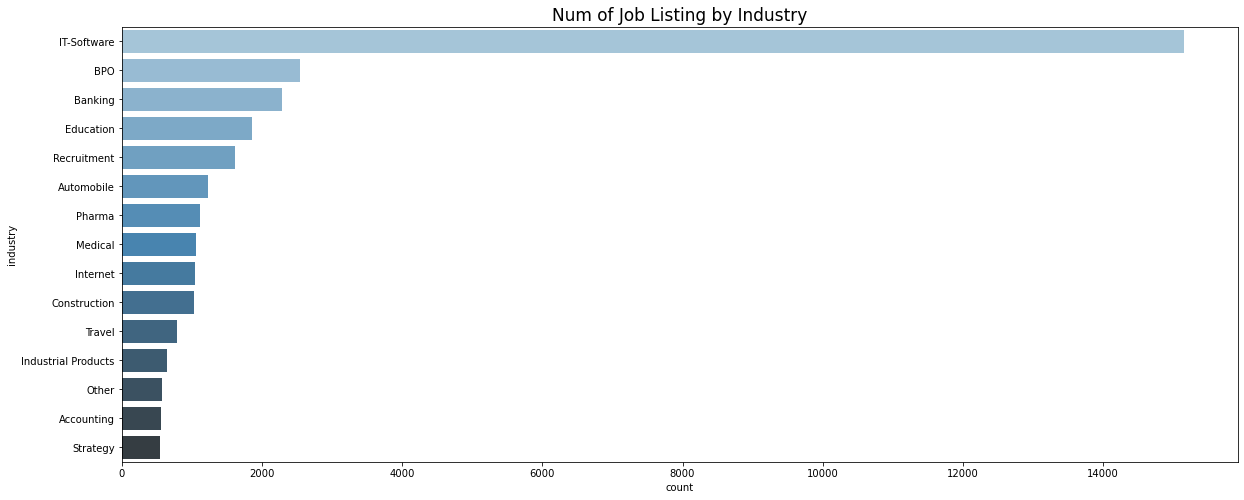

In [49]:
industry15 = industry.head(15)
plt.figure(figsize=(20,8))
plt.title('Num of Job Listing by Industry',fontsize=17)
sns.barplot(y='industry',x='count',data=industry15,palette='Blues_d')

In [50]:
industry_pos = eda.groupby('industry').agg(num_position=('numberofpositions','sum')).sort_values(
    by='num_position',ascending=False).reset_index()
industry_pos

,industry,num_position
0,BPO,619924
1,Medical,259379
2,IT-Software,74212
3,Pharma,73319
4,Travel,52499
5,Advertising,19851
6,Automobile,12047
7,Banking,10192
8,Internet,10159
9,Insurance,8061


<AxesSubplot:title={'center':'Num of Job Listing by Industry'}, xlabel='num_position', ylabel='industry'>

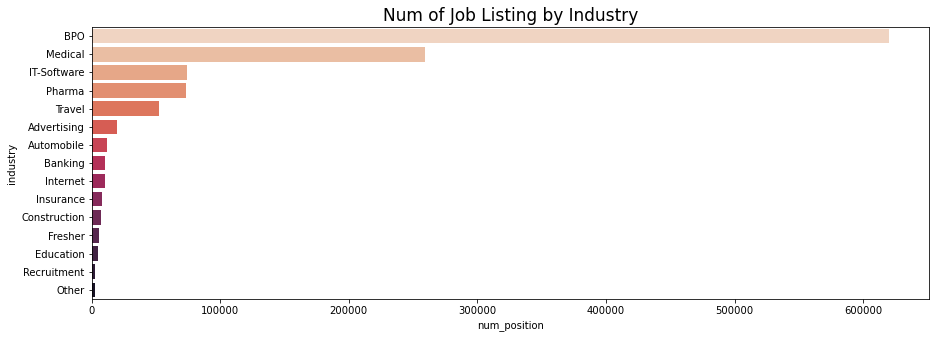

In [51]:
industrypos15 = industry_pos.head(15)
plt.figure(figsize=(15,5))
plt.title('Num of Job Listing by Industry',fontsize=17)
sns.barplot(y='industry',x='num_position',data=industrypos15,palette='rocket_r')

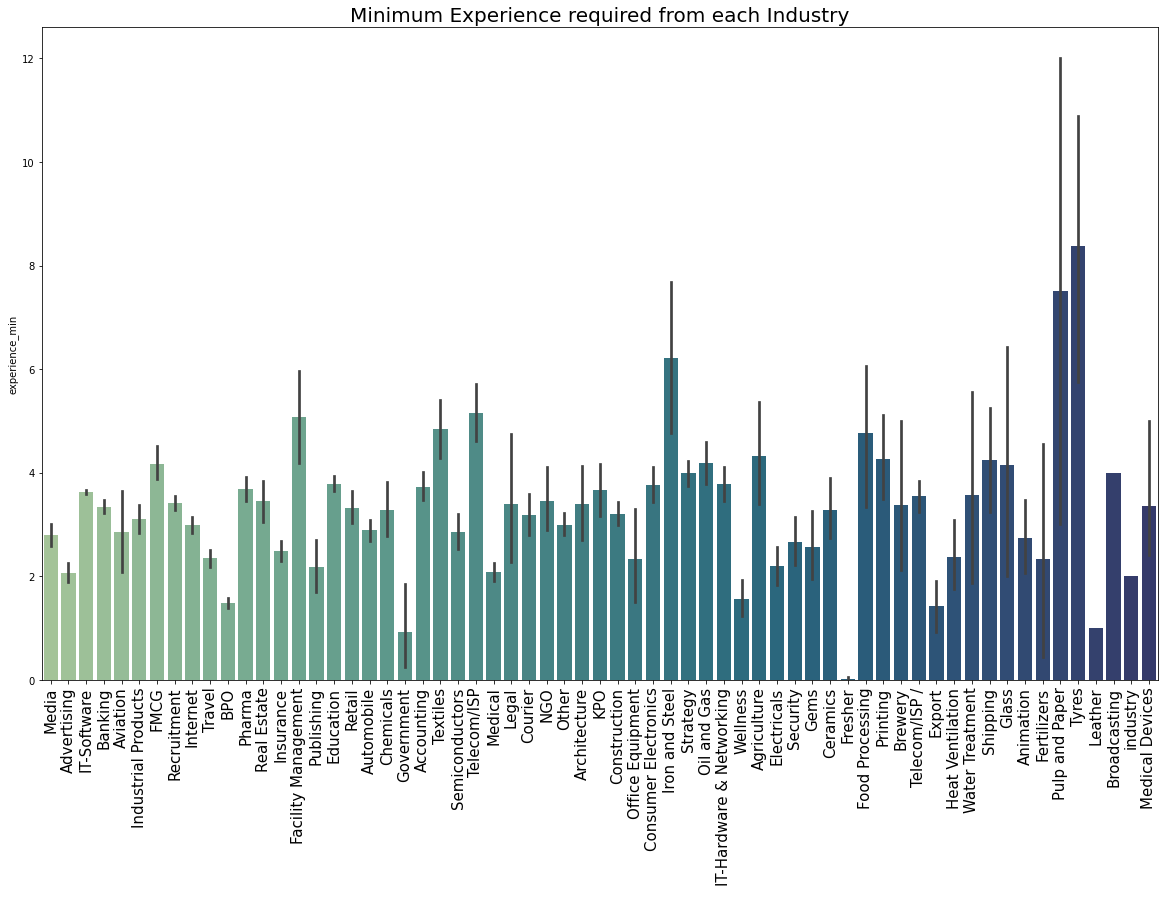

In [52]:
plt.figure(figsize=(20,12))
plt.title('Minimum Experience required from each Industry', fontsize=20)
sns.barplot(y='experience_min', x='industry',data=eda, palette='crest')
plt.xticks(fontsize = 15, rotation = 90)
plt.xlabel(' ')
plt.show()

## Job Location Address

In [53]:
address = eda.groupby('joblocation_address').agg(count=('joblocation_address','count')).sort_values(
by='count', ascending=False).reset_index()
address

,joblocation_address,count
0,Bangalore,9957
1,NCR,8660
2,Mumbai,6403
3,Hyderabad,4566
4,Chennai,3363
5,Pune,1227
6,Kolkata,543
7,unknown,497
8,Ahmedabad,404
9,Chandigarh,189


Text(0.5, 1.0, 'Num of Job Listing by Location')

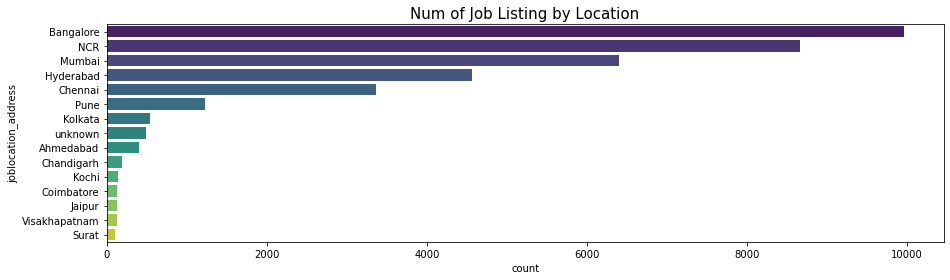

In [54]:
address15 = address.head(15)
sns.barplot(x='count', y='joblocation_address',data=address15, palette='viridis')
plt.title('Num of Job Listing by Location', fontsize=15)

In [55]:
pos = eda.groupby('joblocation_address').agg(num_position_opening=('numberofpositions','sum')).sort_values(
by='num_position_opening', ascending=False).reset_index()
pos

,joblocation_address,num_position_opening
0,NCR,176713
1,Bangalore,117701
2,Hyderabad,109440
3,Chennai,104945
4,Mumbai,85364
5,Pune,59650
6,Kolkata,41875
7,Chandigarh,37804
8,Ahmedabad,32698
9,Vijayawada,15102


Text(0.5, 1.0, 'Num of Position Opening by Location')

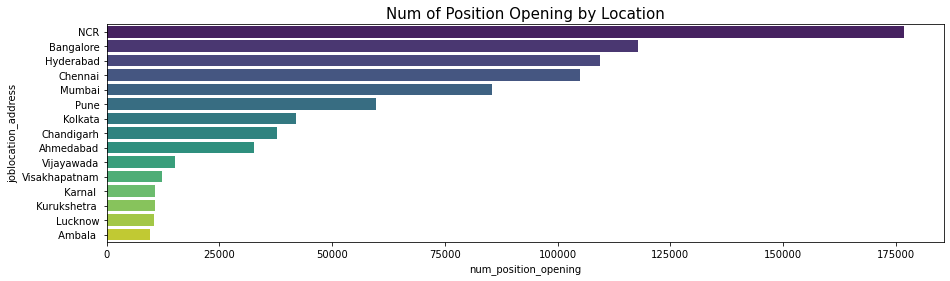

In [56]:
num_position_opening15 = pos.head(15)
sns.barplot(x='num_position_opening', y='joblocation_address',data=num_position_opening15, palette='viridis')
plt.title('Num of Position Opening by Location', fontsize=15)

## Skills

In [57]:
skill_job_opening = eda.groupby('skills').agg(num_vacancy=('skills','count')).sort_values(
    by='num_vacancy', ascending=False).reset_index()
skill_job_opening

,skills,num_vacancy
0,Application Programming,9402
1,Sales,6404
2,ITES,3275
3,Production,1718
4,Accounts,1606
5,HR,1575
6,Teaching,1442
7,Marketing,1398
8,Medical,960
9,unknown,874


Text(0.5, 1.0, 'Number of Vacancy by Skills')

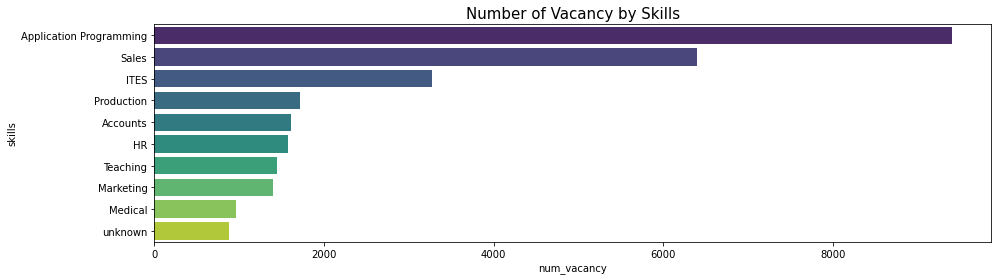

In [58]:
skill_job_opening10 = skill_job_opening.head(10)
sns.barplot(x='num_vacancy', y='skills', data=skill_job_opening10, palette='viridis')
plt.title('Number of Vacancy by Skills', fontsize=15)

In [59]:
skill_pos_opening = eda.groupby('skills').agg(num_position=('numberofpositions','sum')).sort_values(
    by='num_position', ascending=False).reset_index()
skill_pos_opening

,skills,num_position
0,ITES,798155
1,Medical,145571
2,Sales,52417
3,Travel,46035
4,Application Programming,43612
5,Marketing,16848
6,unknown,14884
7,Production,13793
8,HR,6431
9,Accounts,5803


Text(0.5, 1.0, 'Num of Opening Position by Skills')

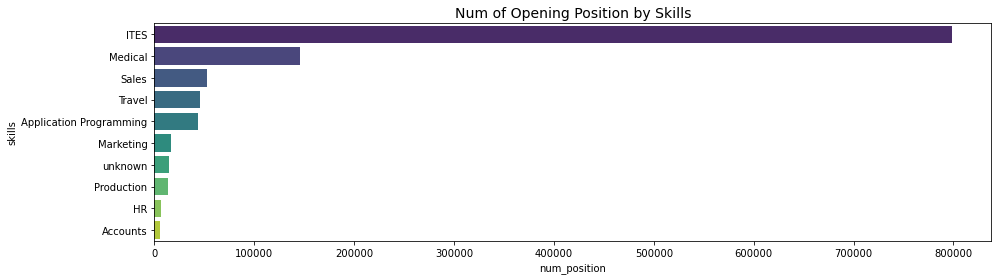

In [60]:
skill_pos_opening10 = skill_pos_opening.head(10)
sns.barplot(y='skills', x='num_position', data=skill_pos_opening10, palette='viridis')
plt.title('Num of Opening Position by Skills', fontsize=14)

In [61]:
eda.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id',
       'experience_min', 'experience_max', 'post_year', 'post_month',
       'post_day_name', 'post_day_date'],
      dtype='object')

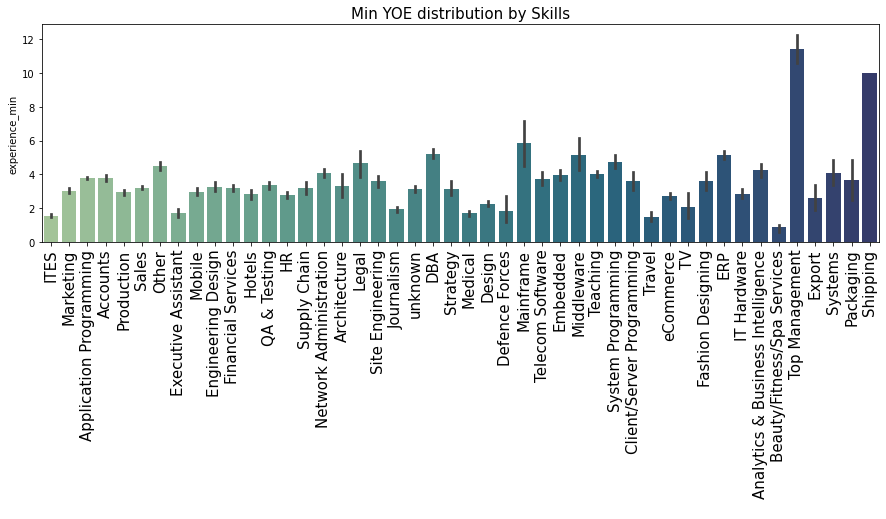

In [62]:
sns.barplot(x='skills', y='experience_min', data=eda, palette='crest')
plt.title('Min YOE distribution by Skills', fontsize=15)
plt.xticks(fontsize = 15, rotation = 90)
plt.xlabel(' ')
plt.show()

# Job Posting

In [63]:
eda.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id',
       'experience_min', 'experience_max', 'post_year', 'post_month',
       'post_day_name', 'post_day_date'],
      dtype='object')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Num of Job Posting by Month')

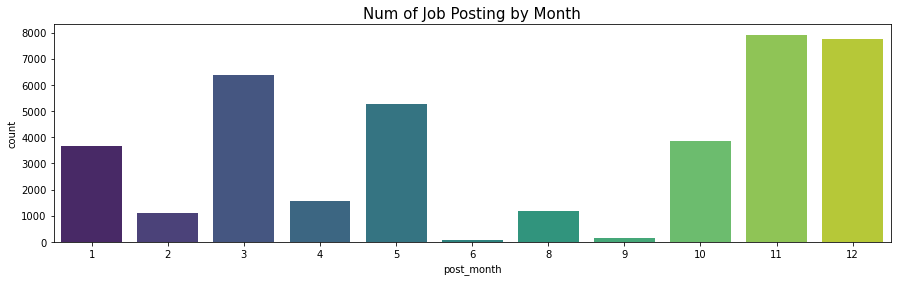

In [64]:
sns.countplot(eda['post_month'], palette='viridis')
plt.title('Num of Job Posting by Month', fontsize=15)

In [65]:
dow = eda.groupby('post_day_name').agg(num_day=('post_day_name','count')).sort_values(
    by='post_day_name', ascending=True)

dow

,num_day
post_day_name,
Friday,8295
Monday,5308
Saturday,3017
Sunday,2993
Thursday,4652
Tuesday,8882
Wednesday,5761


In [66]:
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'Sunday': 0,
 'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6}

In [67]:
dow['day_ID'] = dow.index
dow['day_ID'] = dow['day_ID'].map(sorterIndex)
dow = dow.sort_values(by='day_ID', ascending=True)
dow

,num_day,day_ID
post_day_name,,
Sunday,2993,0
Monday,5308,1
Tuesday,8882,2
Wednesday,5761,3
Thursday,4652,4
Friday,8295,5
Saturday,3017,6


Text(0.5, 0, ' ')

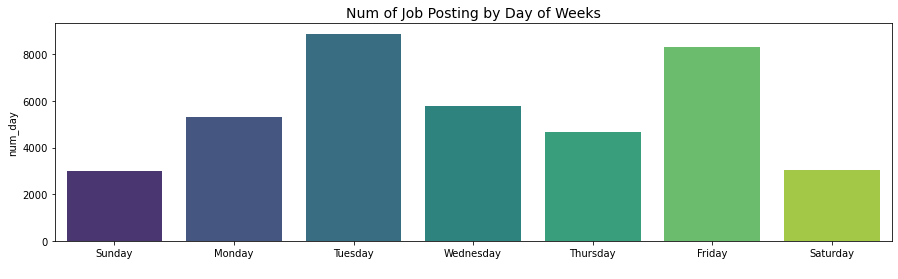

In [68]:
dow = dow.reset_index()
sns.barplot(x='post_day_name', y='num_day', data=dow, palette='viridis')
plt.title('Num of Job Posting by Day of Weeks', fontsize=14)
plt.xlabel(' ')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Num of Job Posting by Day of Month')

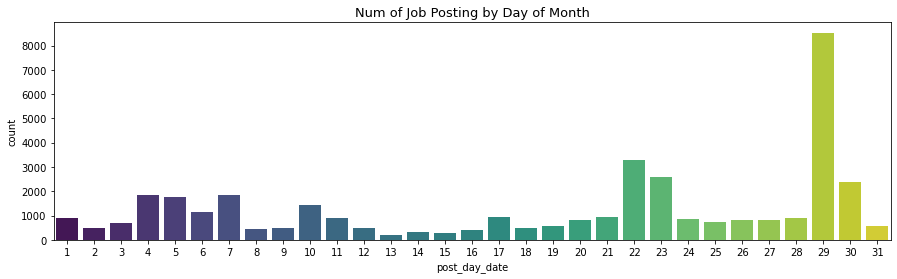

In [69]:
sns.countplot(eda['post_day_date'], palette='viridis')
plt.title('Num of Job Posting by Day of Month', fontsize=13)

## Job Titles

(-0.5, 1999.5, 1999.5, -0.5)

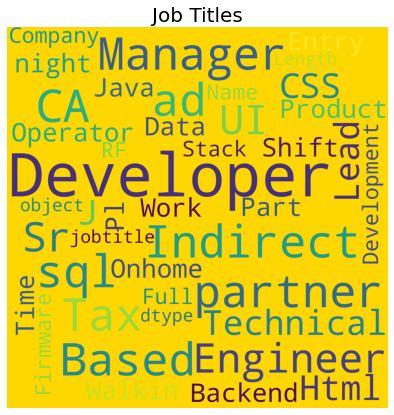

In [70]:
# checking the most popular job titles

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'gold',
                      max_words = 50,
                      stopwords = stopwords,
                      width = 2000,
                      height = 2000).generate(str(df['jobtitle']))

plt.rcParams['figure.figsize'] = (15, 7)
plt.imshow(wordcloud)
plt.title('Job Titles', fontsize = 20)
plt.axis('off')

## Job Searching

In [71]:
# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# for interactive shells
from IPython.display import display

In [77]:
pd.set_option('max_rows', 150)
@interact

def check(City = list(df['joblocation_address'].value_counts().index),
          Industry = list(df['industry'].value_counts().index),
          Experience = list(df['experience_min'].value_counts().sort_values(ascending = False).index),
          Vacancies = 10
          ):
    return df.loc[(df['numberofpositions'] > Vacancies)
                   & (df['joblocation_address'] == City)
                   & (df['industry'] == Industry)
                   & (df['experience_min'] == Experience)][[
                                                      'company',
                                                      'jobtitle',
                                                      'education',
                                                      'payrate',
                                                      'numberofpositions',
                                                      ]].head(10).sort_values(by='numberofpositions',
                                                                              ascending=False).reset_index(drop=True)

interactive(children=(Dropdown(description='City', options=('Bangalore', 'NCR', 'Mumbai', 'Hyderabad', 'Chenna…

(-0.5, 959.5, 546.5, -0.5)

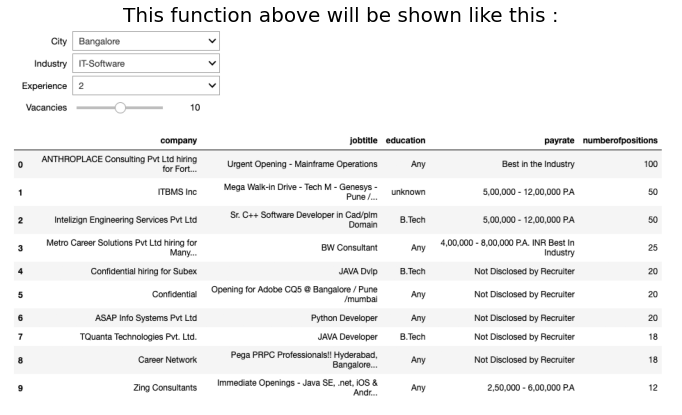

In [79]:
from matplotlib import image

img = image.imread('ss.png')
plt.title('This function above will be shown like this :', fontsize=20)
plt.imshow(img)
plt.axis('off')